## 손글씨 숫자 데이터와 ground truth
- 손글씨 숫자 이미지는 8x8크기의 gray 
- 이미지 데이터는 64개의 숫자로 저장
- 숫자 종류는 10가지: 0 ~ 9
- 이미지는 모두 1,797장
- 데이터는 numpy의 ndarray로 저장

### 손글씨 숫자데이터 분류

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()

X = digits.data
print(type(X))
print(X.shape)

y = digits.target
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(1797, 64)
<class 'numpy.ndarray'>
(1797,)
[0 1 2 ... 8 9 8]


### 손글씨 숫자 Visualization
- 손글씨 데이터 64를 8x8로 reshaping
- color map을 gray로 설정
- 픽셀 값들은 0 ~ 16: 0은 검정, 16은 white

(64,)
(8, 8)
[[ 0.  0.  5. 12.  1.  0.  0.  0.]
 [ 0.  0. 15. 14.  7.  0.  0.  0.]
 [ 0.  0. 13.  1. 12.  0.  0.  0.]
 [ 0.  2. 10.  0. 14.  0.  0.  0.]
 [ 0.  0.  2.  0. 16.  1.  0.  0.]
 [ 0.  0.  0.  6. 15.  0.  0.  0.]
 [ 0.  0.  9. 16. 15.  9.  8.  2.]
 [ 0.  0.  3. 11.  8. 13. 12.  4.]]


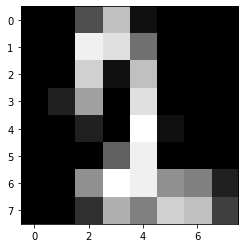

In [ ]:
i = 12

num = X[i]
print(num.shape)
num = num.reshape((8,8))  # 64행 1열을 8행 8열로 바꾼다.
print(num.shape)
print(num)
plt.imshow(num, cmap='gray')
plt.show()

### 학습과 테스트를 위한 데이터 준비 
- 학습용 : 1,617장
- 테스트용 : 180장

### 학습과 테스트 데이터 분류

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

print('Type: x_train, y_train, x_test, y_test')
print(type(x_train), type(y_train), type(x_test), type(y_test))

print('Type: x_train, y_train, x_test, y_test')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Type: x_train, y_train, x_test, y_test
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Type: x_train, y_train, x_test, y_test
(1617, 64) (1617,) (180, 64) (180,)


### 학습 모델과 GPU 활용
- Linear model: 64 -> 10
- Loss: Cross Entropy
- Optimizer: Stochastic Gradient Descent
- GPU 활용을 위해서 학습과 테스트 데이터는 GPU로 이동

### 학습을 위한 모델, Loss, Optimizer 설정

In [ ]:
net = nn.Linear(64,10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

### Tensor로 변환

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float).to('cuda')
y_train = torch.tensor(y_train, dtype=torch.long).to('cuda')
x_test = torch.tensor(x_test, dtype=torch.float).to('cuda')
y_test = torch.tensor(y_test, dtype=torch.long).to('cuda')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


##학습 진행과 loss값의 변화
### 학습시작

In [ ]:
losses = []
net.train()
net.to('cuda')

for epoc in range(600):

  optimizer.zero_grad()

  y_pred = net(x_train)
  loss = loss_fn(y_pred, y_train)
  loss.backward()

  optimizer.step()
  losses.append(loss.item())
  print(epoc, 'Loss: ', loss.item())

0 Loss:  7.1946940422058105
1 Loss:  4.951577186584473
2 Loss:  3.335580825805664
3 Loss:  2.80987286567688
4 Loss:  2.1830105781555176
5 Loss:  1.8918546438217163
6 Loss:  1.6785495281219482
7 Loss:  1.4875942468643188
8 Loss:  1.3586448431015015
9 Loss:  1.2213499546051025
10 Loss:  1.1325994729995728
11 Loss:  1.0265984535217285
12 Loss:  0.955477774143219
13 Loss:  0.8763065338134766
14 Loss:  0.8193393349647522
15 Loss:  0.7631116509437561
16 Loss:  0.7192438840866089
17 Loss:  0.6795251965522766
18 Loss:  0.6463198065757751
19 Loss:  0.616976797580719
20 Loss:  0.5912261009216309
21 Loss:  0.5681625008583069
22 Loss:  0.5473394393920898
23 Loss:  0.5283721089363098
24 Loss:  0.5109923481941223
25 Loss:  0.49499180912971497
26 Loss:  0.4802039861679077
27 Loss:  0.46649104356765747
28 Loss:  0.4537366032600403
29 Loss:  0.44184038043022156
30 Loss:  0.4307161867618561
31 Loss:  0.4202888309955597
32 Loss:  0.4104931354522705
33 Loss:  0.4012712240219116
34 Loss:  0.392572700977325

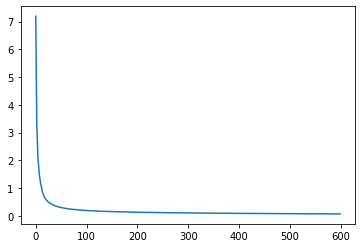

In [ ]:
plt.plot(losses)

### 테스트 시작

In [ ]:
net.eval()

with torch.no_grad():

  test_result = net(x_test)
  pred = torch.argmax(test_result, dim=1)

  num_correct = (pred == y_test).sum().item()
  print('Accuracy : ', num_correct*100.0 / len(y_test), '%')

Accuracy :  95.55555555555556 %
